In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax 

In [3]:
data = pd.read_csv("data_for_lr.csv")

In [4]:
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [5]:
data.isnull().sum()

x    0
y    1
dtype: int64

In [6]:
data= data.dropna()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


In [8]:
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [9]:
data

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [10]:
#training data 
train_input = np.array(data.x[0:500]).reshape(500,1)
train_output = np.array(data.y[0:500]).reshape(500,1)

#validating data 
test_input = np.array(data.x[500:700]).reshape(199,1)
test_output = np.array(data.y[500:700]).reshape(199,1) 

In [11]:
print("Train Input Shape  = {}".format(train_input.shape))
print("Train Output Shape = {}".format(train_output.shape))
print("Test Input Shape   = {}".format(test_input.shape))
print("Test Output Shape  = {}".format(test_output.shape))

Train Input Shape  = (500, 1)
Train Output Shape = (500, 1)
Test Input Shape   = (199, 1)
Test Output Shape  = (199, 1)


## Forward Propagation

In [12]:
def forward_propagation(train_input,parameters):
    m = parameters ['m']
    c = parameters ['c']
    predictions = np.multiply(m, train_input) + c
    return predictions

## Cost Function

In [13]:
def cost_function(predictions, train_output):
    cost= np.mean((predictions-train_output)**2)*0.5
    return cost

## Gradient descent for backpropagation 

In [14]:
def backward_propagation(train_input, train_output, predictions):
    derivatives = dict()
    df = (predictions - train_input)
    dc = np.mean(df)
    dm = np.mean(np.multiply(df, train_input))
    derivatives['dm'] = dm
    derivatives['dc'] = dc
    return derivatives

## update parameters 

In [15]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters['m'] = parameters['m'] - learning_rate * derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate * derivatives['dc']
    return parameters

##  Train Data 

In [16]:
def train(train_input, train_output, learning_rate, iters):
    #random parameters 
    parameters= dict()
    parameters['m'] = np.random.uniform(0,1)
    parameters['c'] = np.random.uniform(0,1)
    
    plt.figure()
    
    #loss
    loss = list()
    
    #iterate 
    for i in range(iters):
        
        #forward propagation
        predictions = forward_propagation(train_input, parameters)
        
        #cost fumction
        cost = cost_function(predictions, train_input)
        
        # append loss and print
        loss.append(cost)
        print("Iteration = {}, loss = {}".format(i+1,cost))
        
        #plot function
        fig, ax = plt.subplots()
                       
        ax.plot(train_input , train_input,'+', label= 'Original')
        ax.plot(train_input , predictions,'*', label= 'Training')
        
        legend= ax.legend()
        
        plt.plot(train_input , train_input,'+', label= 'Original')
        plt.plot(train_input , predictions,'*', label= 'Training')
        
        plt.show()
        
        #back_propagation 
        derivatives = backward_propagation(train_input, train_output , predictions)
        
        #update parameters 
        parameters= update_parameters(parameters, derivatives, learning_rate)
        
    return parameters, loss

## Training 

Iteration = 1, loss = 30.499076849748796


<Figure size 640x480 with 0 Axes>

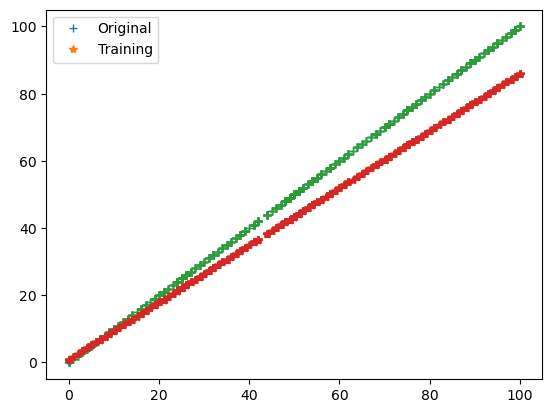

Iteration = 2, loss = 13.887713125902337


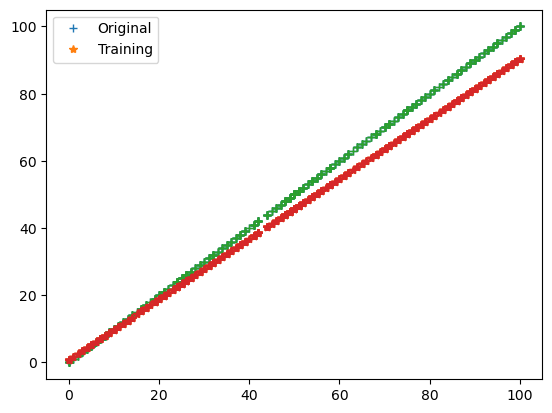

Iteration = 3, loss = 6.351116473794826


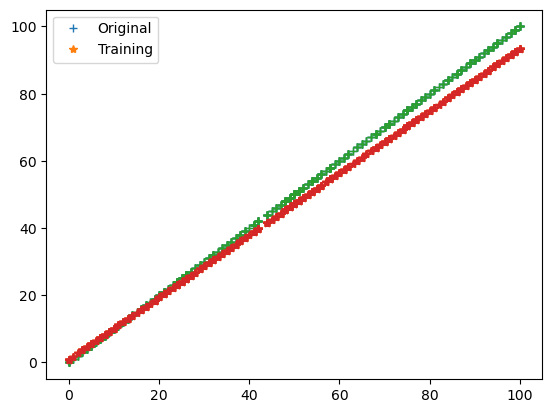

Iteration = 4, loss = 2.9317516938487875


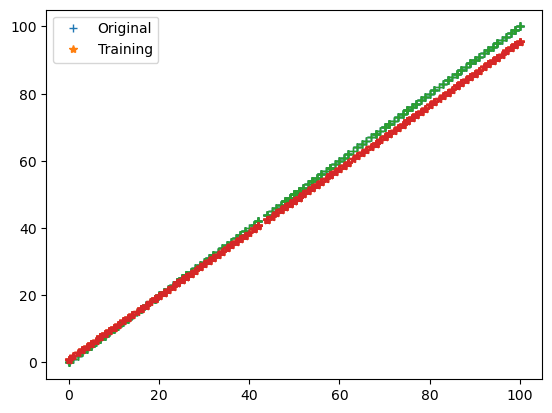

Iteration = 5, loss = 1.3803795748456151


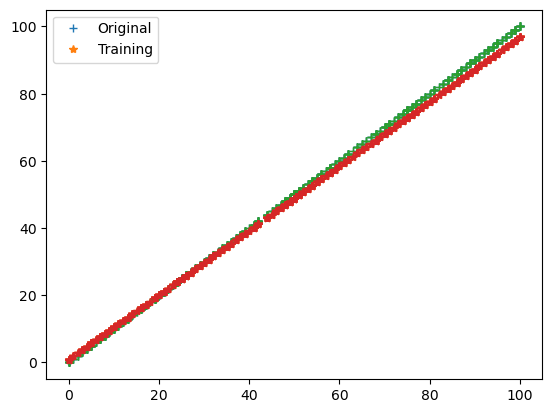

Iteration = 6, loss = 0.6765177953053548


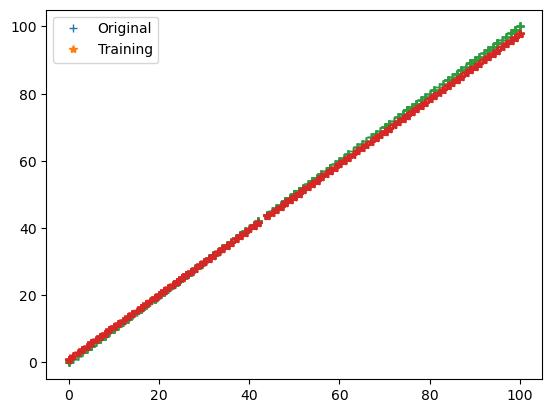

Iteration = 7, loss = 0.3571723956443


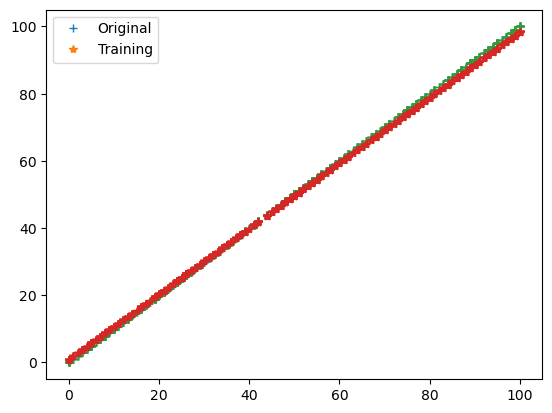

Iteration = 8, loss = 0.21228250356810136


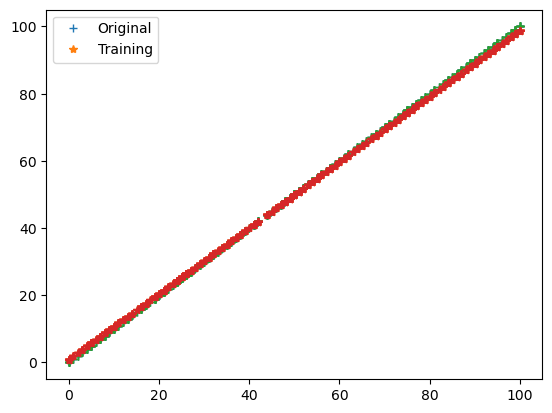

Iteration = 9, loss = 0.1465432686447353


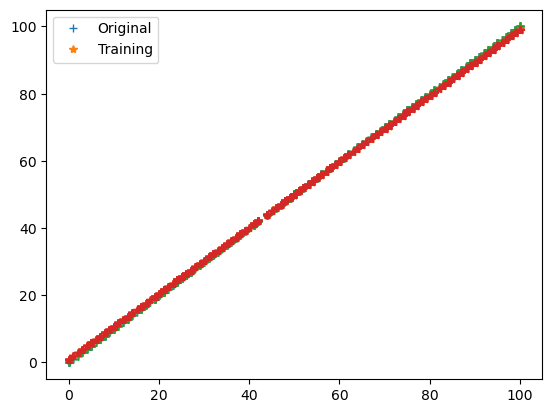

Iteration = 10, loss = 0.11671477466960127


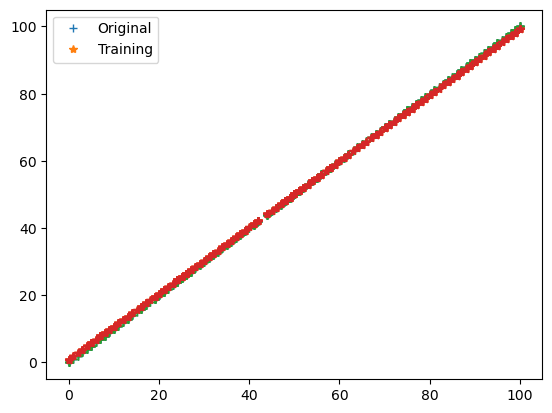

Iteration = 11, loss = 0.10317902376635499


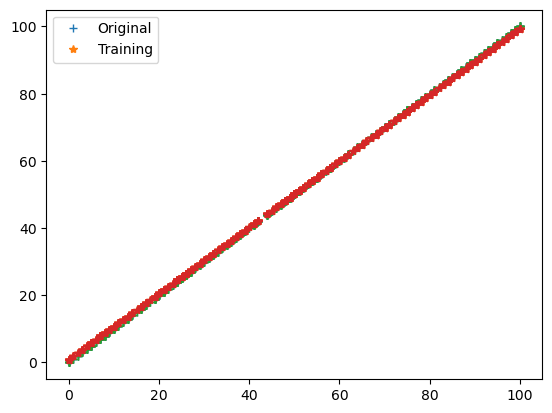

Iteration = 12, loss = 0.09703530856879262


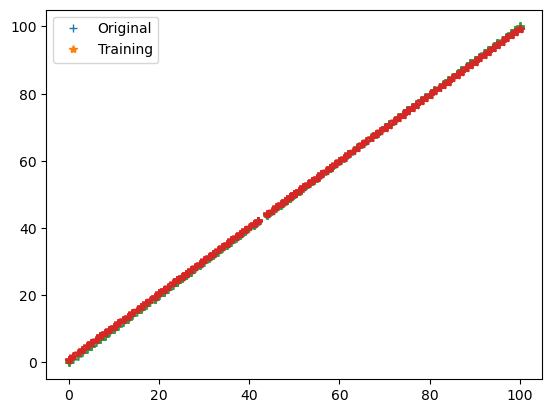

Iteration = 13, loss = 0.0942453682860652


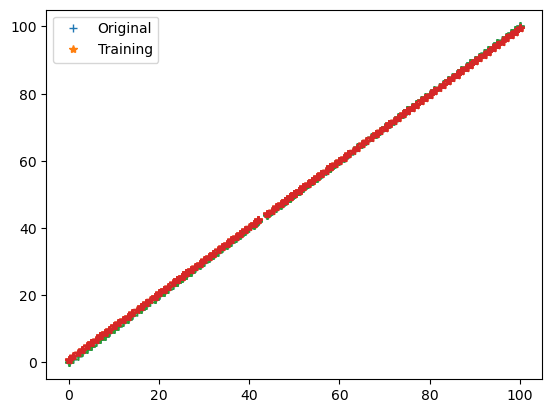

Iteration = 14, loss = 0.09297703952441773


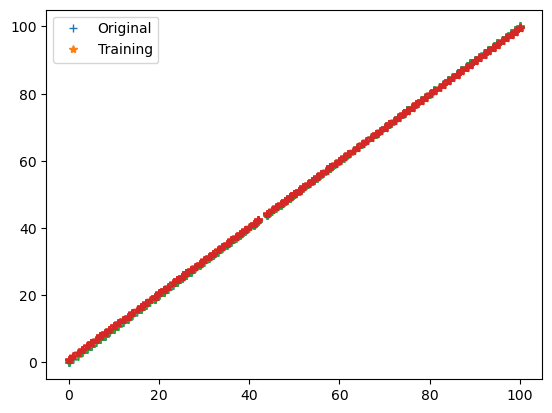

Iteration = 15, loss = 0.09239906772271718


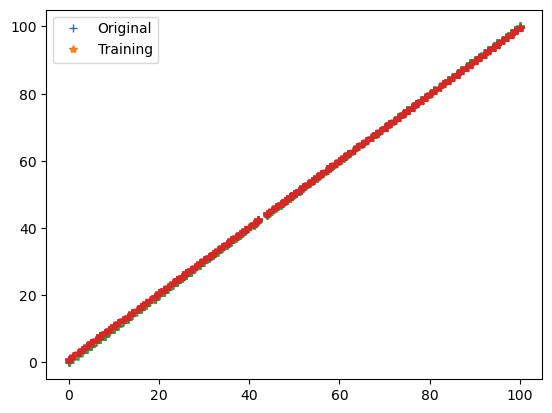

Iteration = 16, loss = 0.09213431176583782


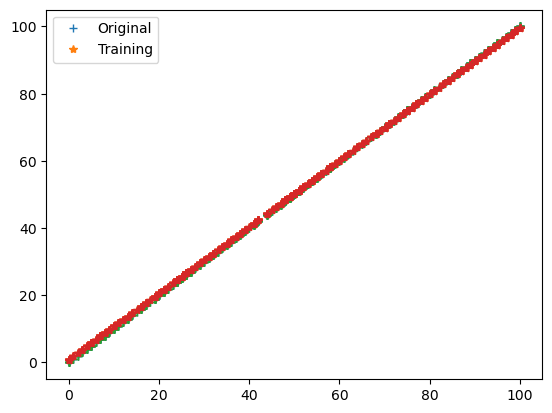

Iteration = 17, loss = 0.09201166231210453


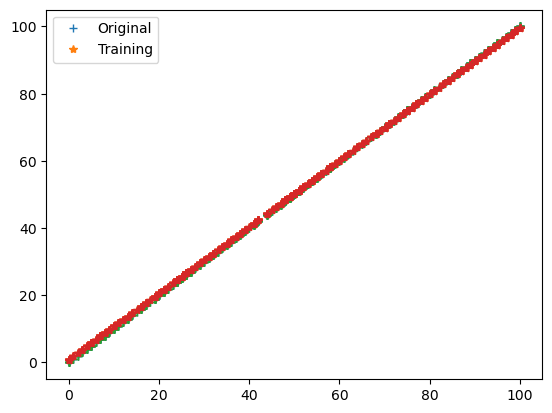

Iteration = 18, loss = 0.09195348686366606


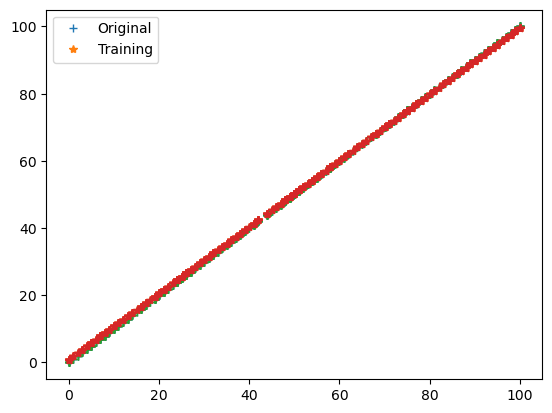

Iteration = 19, loss = 0.09192456347024963


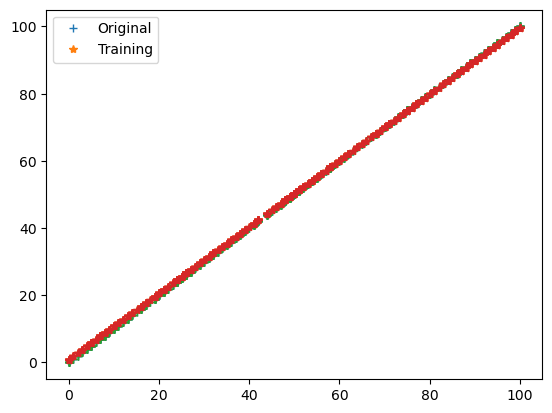

Iteration = 20, loss = 0.09190891189399891


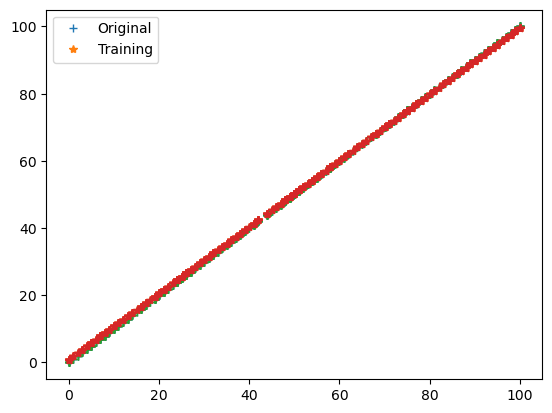

In [17]:
parameters, loss = train(train_input, train_output, 0.0001, 20)

In [18]:
print(parameters)

{'m': 0.9870169627179817, 'c': 0.8541282195156015}


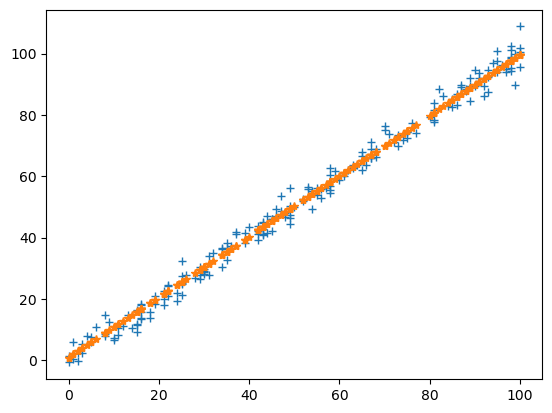

In [19]:
test_predictions = test_input * parameters['m'] + parameters['c'] 
plt.figure()
plt.plot(test_input, test_output, '+')
plt.plot(test_input, test_predictions, '*')
plt.show()

In [20]:
cost_function(test_predictions, test_output)

4.001190363433143